# Ternary Plots

In [1]:
import poisson_approval as pa
from fractions import Fraction

## SimplexToProfile

Poisson Approval relies on the package *python-ternary* to draw plots on the simplex of $\mathbb{R}^3$. The coordinates of a point are denoted *right*, *top* and *left* because they are respectively equal to 1 at the right, top and left corners of the triangular figure. They typically represent shares of different types in a profile. In order to draw plots, we need a *SimplexToProfile* object that will generate the needed profiles:

In [2]:
simplex_to_profile = pa.SimplexToProfile(
    pa.ProfileNoisyDiscrete,
    right_type='c>a~b',
    top_type=('abc', 0.5, 0.01), 
    left_type=('bac', 0.5, 0.01), 
    d_type_fixed_share={('abc', 0.1, 0.01): Fraction(1, 10), 
                        ('abc', 0.9, 0.01): Fraction(1, 10)}
)

The above syntax defines a function *simplex_to_profile* that maps a tuple *(right, top, left)* to a profile defined as:

* The class of profile is *ProfileNoisyDiscrete*,
* A fixed share 1/10 of voters are of type $(abc, 0.1, 0.01)$, and a fixed share 1/10 of voters are of type $(abc, 0.9, 0.01)$,
* The other voters, i.e. a share 8/10, are distributed between *right_type*, *top_type* and *left_type*, in respective proportions that are given by the input tuple *(right, top, left)*.

For example:

In [3]:
simplex_to_profile(right=Fraction(17, 80), top=Fraction(52, 80), left=Fraction(11, 80))

<abc 0.1 ± 0.01: 1/10, abc 0.5 ± 0.01: 13/25, abc 0.9 ± 0.01: 1/10, bac 0.5 ± 0.01: 11/100, c>a~b: 17/100> (Condorcet winner: a)

## Scale

All the plots require a resolution parameter called *scale*. For example, if *scale=10*, then the simplex is divided into cells of diameter 1/10 and the value of the plotted function is computed at the center of each cell. For more information, cf. the documentation of the package *python-ternary*. In this tutorial, we define a global parameter *SCALE* and we will use it for all the plots.

In [4]:
SCALE = 21

## Number of Equilibria

By default, the function *ternary_plot_n_equilibria* computes the ordinal equilibria, i.e. those where all voters having the same ranking cast the same ballot:

(<Figure size 504x360 with 2 Axes>, TernaryAxesSubplot: -9223371856912385606)

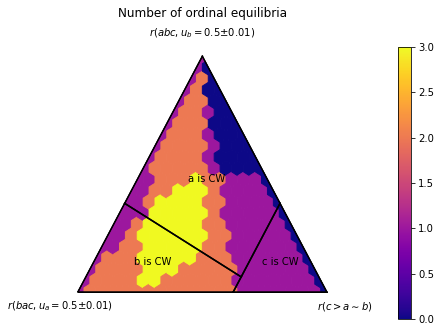

In [5]:
pa.ternary_plot_n_equilibria(
    simplex_to_profile,
    scale=SCALE,
    title='Number of ordinal equilibria')

Using the option *meth*, you can investigate other kinds of equilibria:

(<Figure size 504x360 with 2 Axes>, TernaryAxesSubplot: 179942908841)

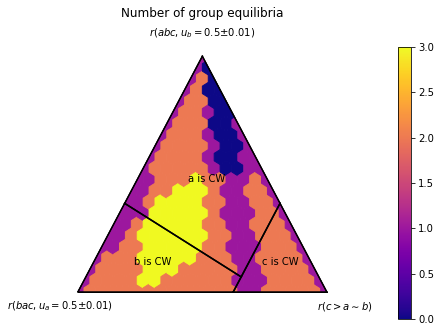

In [6]:
pa.ternary_plot_n_equilibria(
    simplex_to_profile, 
    scale=SCALE,
    title='Number of group equilibria', 
    meth='analyzed_strategies_group')

Depending on the class of profile, the possible values of the option *meth* may be:

* ``'analyzed_strategies_ordinal'`` (the default),
* ``'analyzed_strategies_group'`` (for profiles where a reasonable notion of group is defined, such as *ProfileNoisyDiscrete*),
* ``'analyzed_strategies_pure'`` (for discrete profiles such as *ProfileDiscrete* or *ProfileTwelve*).

## Winners at Equilibrium

The function *ternary_plot_n_equilibria* works similarly:

(<Figure size 360x360 with 1 Axes>, TernaryAxesSubplot: 179942953992)

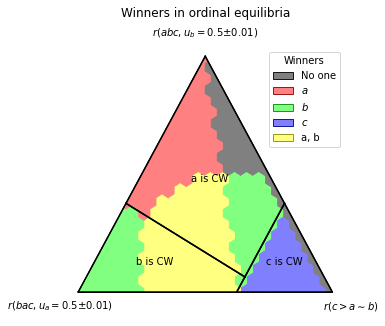

In [7]:
pa.ternary_plot_winners_at_equilibrium(
    simplex_to_profile, 
    scale=SCALE,
    title='Winners in ordinal equilibria')

(<Figure size 360x360 with 1 Axes>, TernaryAxesSubplot: -9223371856911650886)

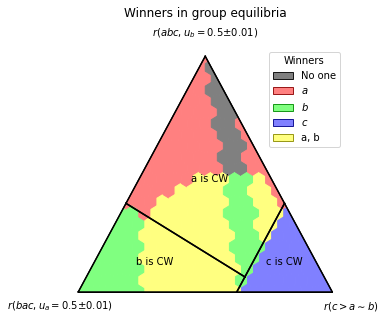

In [8]:
pa.ternary_plot_winners_at_equilibrium(
    simplex_to_profile, 
    scale=SCALE,
    title='Winners in group equilibria',
    legend_title='Winners', 
    meth='analyzed_strategies_group')

## Winning Frequencies in Fictitious Play or Iterated Voting

By default, the function *ternary_plot_winning_frequencies* computes the winning frequencies in fictitious play, with an initialization in sincere strategy, and with all update ratios in $1 / \log(t + 1)$:

(<Figure size 360x360 with 2 Axes>, TernaryAxesSubplot: -9223371856911637083)

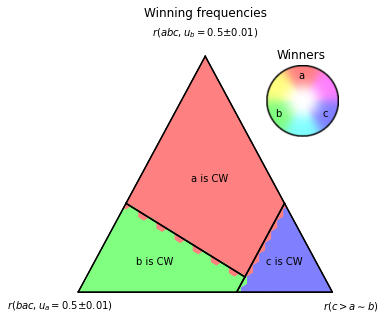

In [9]:
pa.ternary_plot_winning_frequencies(simplex_to_profile, scale=SCALE, n_max_episodes=100)

You can change this behavior with the optional parameters of the function:

(<Figure size 360x360 with 2 Axes>, TernaryAxesSubplot: -9223371856911022816)

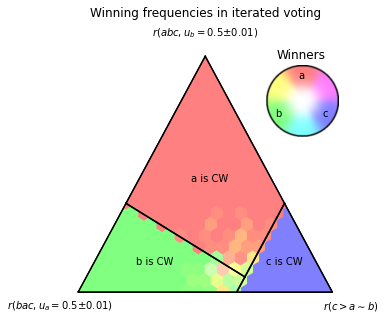

In [10]:
pa.ternary_plot_winning_frequencies(
    simplex_to_profile, 
    scale=SCALE, 
    meth='iterated_voting',
    init='random_tau_undominated',
    samples_per_point=10, 
    perception_update_ratio=1,
    ballot_update_ratio=1,
    winning_frequency_update_ratio=pa.one_over_t,
    n_max_episodes=100, 
    title='Winning frequencies in iterated voting',
    legend_title='Winners'
)

## Convergence Rate in Fictitious Play or Iterated Voting

The function *ternary_plot_convergence* computes the convergence frequency in fictitious play or iterated voting, which is defined as the proportion of initializations that lead to convergence within *n_max_episodes* iterations. Its syntax is similar to *ternary_plot_winning_frequencies*.

(<Figure size 504x360 with 2 Axes>, TernaryAxesSubplot: -9223371856909673100)

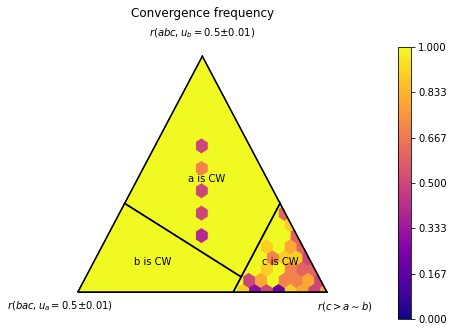

In [11]:
pa.ternary_plot_convergence(simplex_to_profile, scale=SCALE, n_max_episodes=100,
                            init='random_tau', samples_per_point=10)

## Customize the Plot

Grid and lines:

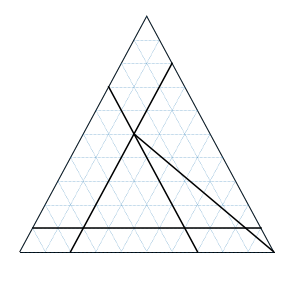

In [12]:
figure, tax = pa.ternary_figure()
tax.gridlines_simplex(multiple=0.1)
tax.horizontal_line_simplex(0.1)
tax.left_parallel_line_simplex(0.2)
tax.right_parallel_line_simplex(0.3)
tax.line_simplex((1, 0, 0), (0.2, 0.5, 0.3))

Titles and annotations:

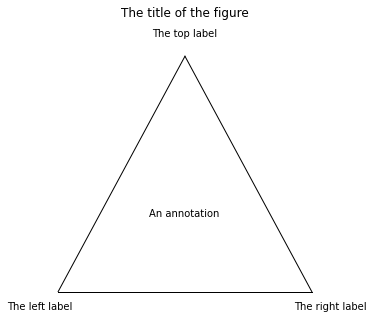

In [13]:
figure, tax = pa.ternary_figure()
tax.set_title_padded('The title of the figure')
tax.right_corner_label('The right label')
tax.top_corner_label('The top label')
tax.left_corner_label('The left label')
tax.annotate_simplex('An annotation', (0.33, 0.33, 0.33))

## Advanced Intensity Heat Maps

First, define a function that maps a point of the simplex to a number:

In [14]:
def f(right, top, left):
    return (right**2 + top) / (left + 1)

Then use the method *heatmap_intensity*:

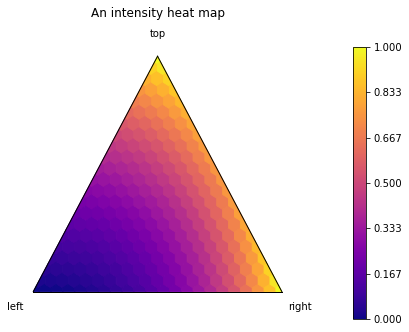

In [15]:
figure, tax = pa.ternary_figure(scale=SCALE)
tax.heatmap_intensity(f, 
                      left_label='left',
                      right_label='right',
                      top_label='top')
tax.set_title_padded('An intensity heat map')

## Advanced Candidate Heat Maps

First, define a function that maps a point of the simplex to a list of size 3 (associated with candidates *a*, *b*, *c*):

In [16]:
def g(right, top, left):
    a = top**.5
    b = left**2
    c = 1 - a - b
    return [a, b, c]

Then use the method *heatmap_candidates*:

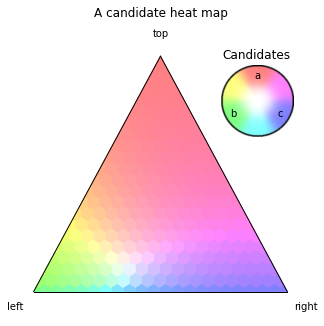

In [17]:
figure, tax = pa.ternary_figure(scale=SCALE)
tax.heatmap_candidates(g, 
                       left_label='left',
                       right_label='right',
                       top_label='top',
                       legend_title='Candidates',
                       legend_style='palette')
tax.set_title_padded('A candidate heat map')